<a href="https://colab.research.google.com/github/HO94/InsightMining_HonGong/blob/main/08_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가중치 시각화

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

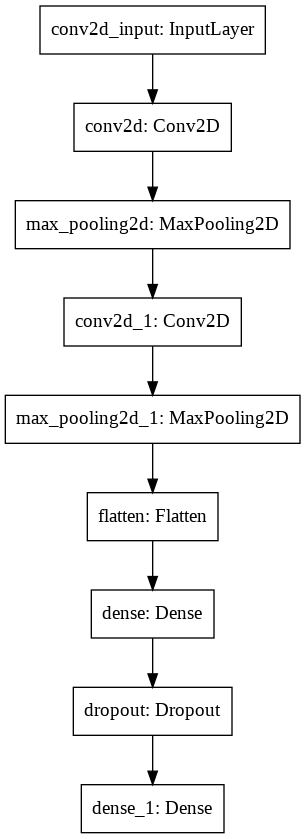

In [ ]:
keras.utils.plot_model(model)

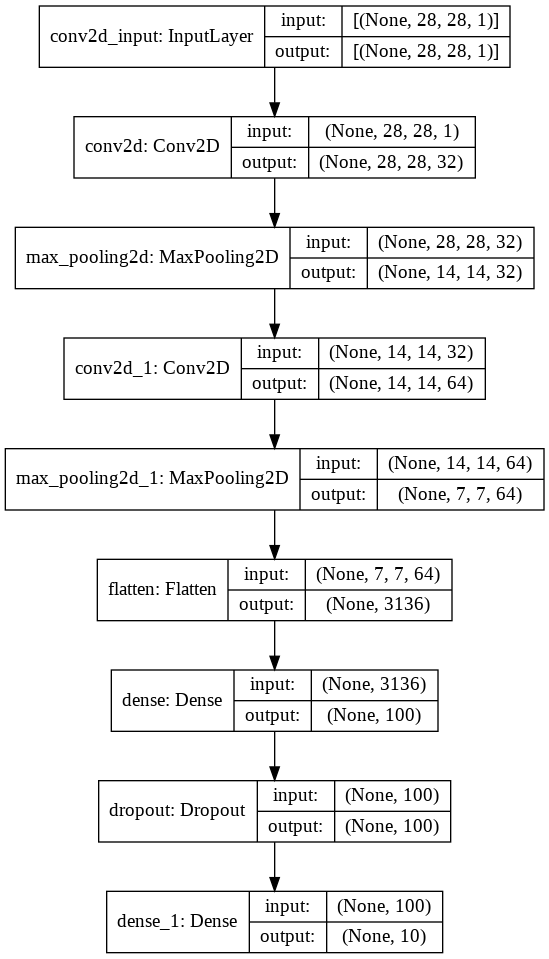

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 60s 39ms/step - loss: 0.5161 - accuracy: 0.8145 - val_loss: 0.3188 - val_accuracy: 0.8869
Epoch 2/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3371 - accuracy: 0.8806 - val_loss: 0.2695 - val_accuracy: 0.9007
Epoch 3/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2896 - accuracy: 0.8969 - val_loss: 0.2577 - val_accuracy: 0.9006
Epoch 4/20
1500/1500 [==============================] - 58s 38ms/step - loss: 0.2559 - accuracy: 0.9080 - val_loss: 0.2367 - val_accuracy: 0.9109
Epoch 5/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2340 - accuracy: 0.9141 - val_loss: 0.2284 - val_accuracy: 0.9157
Epoch 6/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2156 - accuracy: 0.9199 - val_loss: 0.2215 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.1971 - accuracy: 0.9266 - val_loss: 0.2278 -

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [ ]:
print(conv.weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-3.02188303e-02, -2.05633923e-01,  1.84450317e-02,
          -2.39080355e-01, -4.17750254e-02,  1.21223696e-01,
          -3.09859633e-01, -1.34413630e-01, -6.78111380e-03,
           3.08161050e-01, -4.52051423e-02, -3.51441354e-02,
          -2.52329826e-01, -1.57809570e-01, -1.69713050e-01,
           6.27558529e-02, -2.81346262e-01,  1.78017184e-01,
           1.48590878e-01,  1.08754143e-01, -1.46302819e-01,
          -2.34720618e-01,  1.52975023e-01,  1.46248311e-01,
           7.19977450e-03, -6.31504297e-01,  2.02823102e-01,
           2.26286668e-02,  1.06655359e-01, -1.06079191e-01,
           2.89949119e-01, -3.06325585e-01]],

        [[ 2.71879494e-01, -2.70133112e-02, -2.47111231e-01,
          -3.03549588e-01, -1.26811549e-01,  1.38966441e-01,
           2.86824316e-01,  3.24909911e-02, -4.72311452e-02,
           1.82873860e-01,  1.06696121e-01,  6.75819963e-02,
           4.76912335e-02

In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.027100934 0.24771376


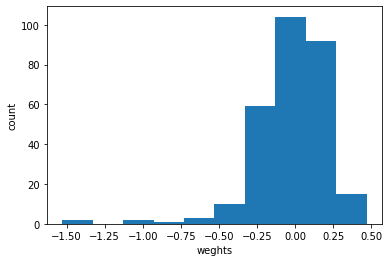

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weghts')
plt.ylabel('count')
plt.show()

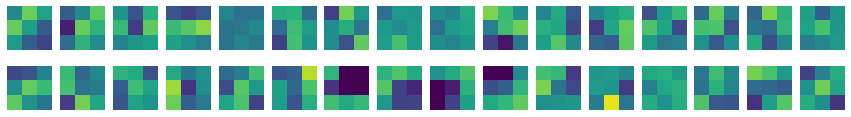

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :,0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')

plt.show()

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0019963798 0.08043677


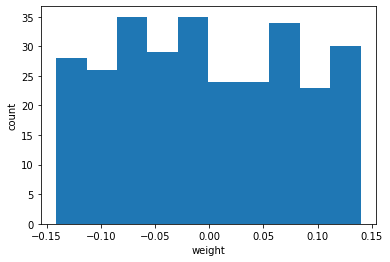

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

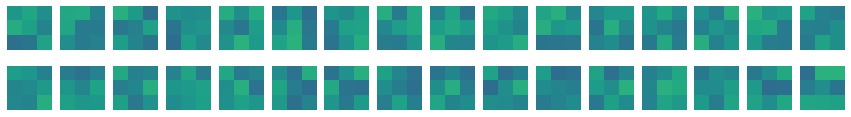

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')

plt.show()

# 함수형 API

In [ ]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [ ]:
inputs = keras.Input(shape = (784,))

In [ ]:
hidden = dense1(inputs)

In [ ]:
outputs = dense2(hidden)

In [ ]:
model1 = keras.models.Model(inputs, outputs)

In [ ]:
print(model.inputs)

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_9')>]


In [ ]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

# 특성 맵 시각화

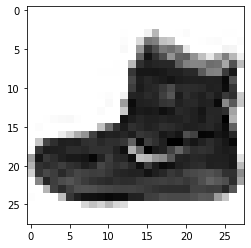

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 1)


IndexError: ignored

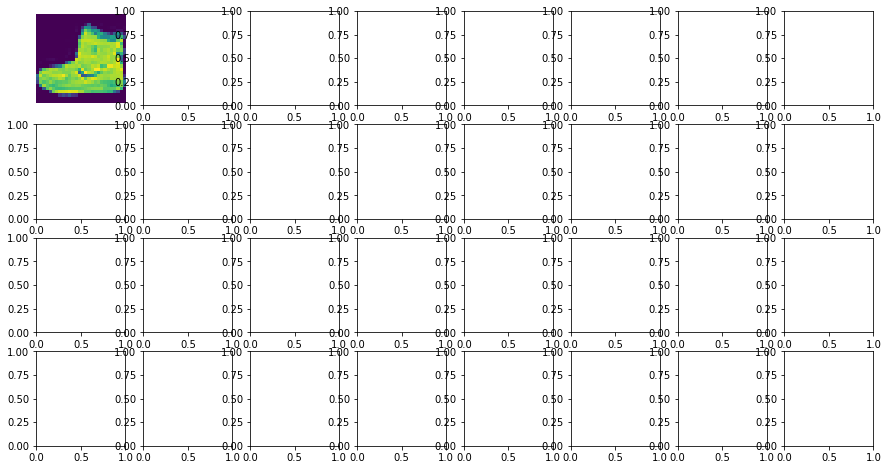

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')

plt.show()

In [ ]:
covn2_acti = keras.models.Model(model.input, model.lyaers[2].output)

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

In [ ]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')

plt.show()